<h1>Titanic: Machine Learning from Disaster</h1>

Solution to the training set in kaggle named "Titanic: Machine Learning from Disaster".
Link: https://www.kaggle.com/c/titanic

# 1. Importing data

In [197]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [198]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [199]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. Analysing parameters

## 2.1 Sex

### 2.1.1 Missing values

In [200]:
miss_sex = pd.DataFrame({"train" : train["Sex"].isnull().sum(), "test": test["Sex"].isnull().sum()}, index = ["Count"])
miss_sex.head()

,test,train
Count,0,0


No missing values found

### 2.1.2 Plot

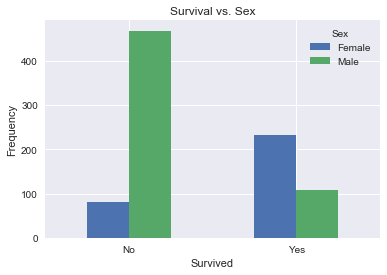

In [201]:
survivedXsex = pd.crosstab(train["Survived"], train["Sex"])
ax = survivedXsex.plot(kind="bar")

ax.set_xlabel("Survived")
ax.set_ylabel("Frequency")

plt.xticks([0, 1], ["No", "Yes"], rotation=0)
plt.legend(["Female", "Male"], title= "Sex")
plt.title("Survival vs. Sex")
plt.show()

### 2.1.3 Normalization

In [202]:
# Transform Male and Female into 1 and 0 for both train and test set
train.loc[train["Sex"] == "male", "Sex"] = 1
train.loc[train["Sex"] == "female", "Sex"] = 0

### 2.1.4 Replicate to test

In [203]:
test.loc[test["Sex"] == "male", "Sex"] = 1
test.loc[test["Sex"] == "female", "Sex"] = 0

## 2.2 Age

### 2.1.1 Missing values

In [204]:
miss_age = pd.DataFrame({"train" : train["Age"].isnull().sum(), "test": test["Age"].isnull().sum()}, index = ["Count"])
miss_age.head()

,test,train
Count,86,177


Replace the missing values with the average

In [205]:
train.loc[train["Age"].isnull(), "Age"] = np.floor(train["Age"].mean())

Now, check again the missing values

In [206]:
miss_age = pd.DataFrame({"train" : train["Age"].isnull().sum(), "test": test["Age"].isnull().sum()}, index = ["Count"])
miss_age.head()

,test,train
Count,86,0


### 2.2.2 Plot

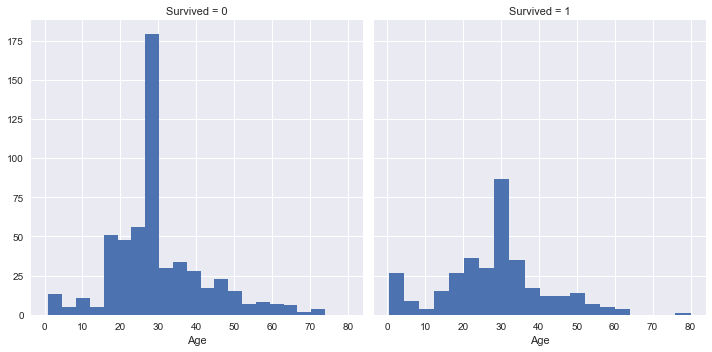

In [207]:
survivedXage = sns.FacetGrid(train, col="Survived", size = 5)
survivedXage.map(plt.hist, "Age", bins=20)

### 2.2.3 Normalization

Convert ages to integer values

In [208]:
train["Age"] = train["Age"].astype(int)

### 2.2.4 Add new column

It is important to go from ages to interval of ages

In [209]:
train["AgeInt"] = pd.cut(train["Age"], 5)

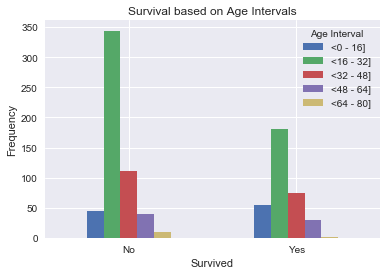

In [210]:
# Plot the new column
survivedXageinterval = pd.crosstab(train["Survived"], train["AgeInt"])
ax = survivedXageinterval.plot(kind="bar", legend=True)

ax.set_xlabel("Survived")
ax.set_ylabel("Frequency")

plt.xticks([0, 1], ["No", "Yes"], rotation=0)
plt.legend(["<0 - 16]", "<16 - 32]", "<32 - 48]", "<48 - 64]", "<64 - 80]"], title="Age Interval")
plt.title("Survival based on Age Intervals")
plt.show()

In [211]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeInt
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.2500,NaN,S,"(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.2833,C85,C,"(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.9250,NaN,S,"(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.1000,C123,S,"(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8.0500,NaN,S,"(32.0, 48.0]"


In [212]:
# Now parse the interval into numeric values
def getInterval(age):
    for i in range(0,10):
        if age <=16 * (i + 1):
            return i
        
train["AgeInt"] = train["Age"].apply(lambda x: getInterval(x))

In [213]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeInt
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8.0500,NaN,S,2


### 2.2.5 Replicate to test

In [214]:
test.loc[test["Age"].isnull(), "Age"] = np.floor(test["Age"].mean())
test["Age"] = test["Age"].astype(int)
test["AgeInt"] = pd.cut(test["Age"], 5)
test["AgeInt"] = test["Age"].apply(lambda x: getInterval(x))

## 2.3 Ticket class

### 2.3.1 Missing values

In [215]:
miss_pclass = pd.DataFrame({"train" : train["Pclass"].isnull().sum(), "test": test["Pclass"].isnull().sum()}, index = ["Count"])
miss_pclass.head()

,test,train
Count,0,0


No missing values found

### 2.3.2 Plot

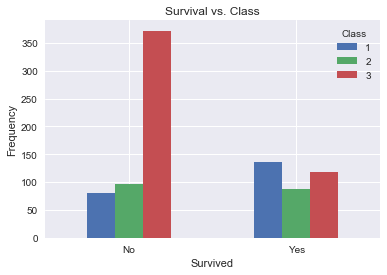

In [216]:
survivedXclass = pd.crosstab(train["Survived"], train["Pclass"])
ax = survivedXclass.plot(kind="bar")

ax.set_xlabel("Survived")
ax.set_ylabel("Frequency")

plt.xticks([0, 1], ["No", "Yes"], rotation=0)
plt.legend(["1", "2", "3"], title= "Class")
plt.title("Survival vs. Class")
plt.show()

### 2.3.3 Normalization

Nothing to normalize in this feature

### 2.3.4 Replicate to test

Nothing to replicate in this feature

## 2.4 Name

### 2.4.1 Missing values

In [217]:
miss_name = pd.DataFrame({"train" : train["Name"].isnull().sum(), "test": test["Name"].isnull().sum()}, index = ["Count"])
miss_name.head()

,test,train
Count,0,0


No missing values found

### 2.4.2 Plot

There is no point in plotting Name vs Survived. However, is possible to plot the title (Mr., Mrs., Miss., etc) vs Survived 

In [218]:
# Create function that will return the title from Name
def getTitle(title):
    return title.split(",")[1].split(" ")[1]

In [219]:
# Create a new column with the title
train["Title"] = train["Name"].apply(lambda x: getTitle(x))
# Check that column is added
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeInt,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.2500,NaN,S,1,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.2833,C85,C,2,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.1000,C123,S,2,Mrs.
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8.0500,NaN,S,2,Mr.


In [220]:
# Check the different type of title in train
train["Title"].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Col.           2
Mlle.          2
Major.         2
the            1
Capt.          1
Don.           1
Sir.           1
Jonkheer.      1
Lady.          1
Ms.            1
Mme.           1
Name: Title, dtype: int64

Since there are titles with so few rows, is better to group then. The new titles will be "Mr", "Miss", "Mrs", "Master" and "Others".
Also, titles as "Mme" (from the french Madame), "Ms" (that can refer to either "Mrs" or "Miss") and "Mlle" (from the french "Mademoiselle") can be repalce to "Miss".

In [221]:
def setTitle(argument):
    switcher = {
        "Mr.": "Mr",
        "Miss.": "Miss",
        "Mrs.": "Mrs",
        "Master.": "Master",
        "Mme.": "Miss",
        "Ms.": "Miss",
        "Mlle.": "Miss",
    }
    return switcher.get(argument, "Others")


In [222]:
train["Title"] = train["Title"].apply(lambda x: setTitle(x))

In [223]:
# Now check again the new values
train["Title"].value_counts()

Mr        517
Miss      186
Mrs       125
Master     40
Others     23
Name: Title, dtype: int64

After setting the new values of the "Title" column, is possible to plot

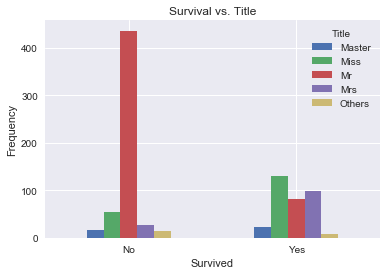

In [224]:
survivedXtitle = pd.crosstab(train["Survived"], train["Title"])
ax = survivedXtitle.plot(kind="bar")

ax.set_xlabel("Survived")
ax.set_ylabel("Frequency")

plt.xticks([0, 1], ["No", "Yes"], rotation=0)
plt.legend(title= "Title")
plt.title("Survival vs. Title")
plt.show()

Finaly, drop the "Name" column 

In [225]:
train = train.drop(["Name"], axis = 1)

### 2.4.3 Normalization

Now, normalize the Title column to numeric values

In [226]:
def getTitleId(title):
    if title == "Mr":
        return 0
    if title == "Miss":
        return 1
    if title == "Mrs":
        return 2
    if title == "Master":
        return 3
    return 4
train["Title"] = train["Title"].apply(lambda x: getTitleId(x))

### 2.4.4 Replicate to test

In [227]:
test["Title"] = test["Name"].apply(lambda x: getTitle(x))
test["Title"] = test["Title"].apply(lambda x: setTitle(x))
test = test.drop(["Name"], axis = 1);
test["Title"] = test["Title"].apply(lambda x: getTitleId(x))

## 2.5 Embarkation

### 2.5.1 Missing values

In [228]:
miss_embarkation = pd.DataFrame({"train" : train["Embarked"].isnull().sum(), "test": test["Embarked"].isnull().sum()}, index = ["Count"])
miss_embarkation.head()

,test,train
Count,0,2


Replace the missing values with the most common

In [229]:
train.loc[train["Embarked"].isnull(), "Embarked"] = train["Embarked"].value_counts().argmax()

In [230]:
# Check again for missing values
miss_embarkation = pd.DataFrame({"train" : train["Embarked"].isnull().sum(), "test": test["Embarked"].isnull().sum()}, index = ["Count"])
miss_embarkation.head()

,test,train
Count,0,0


### 2.5.2 Plot

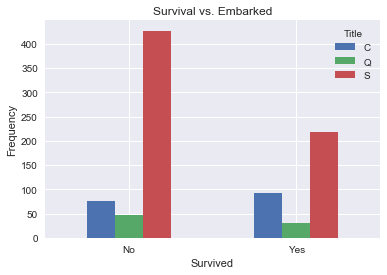

In [231]:
survivedXEmbarked = pd.crosstab(train["Survived"], train["Embarked"])
ax = survivedXEmbarked.plot(kind="bar")

ax.set_xlabel("Survived")
ax.set_ylabel("Frequency")

plt.xticks([0, 1], ["No", "Yes"], rotation=0)
plt.legend(title= "Title")
plt.title("Survival vs. Embarked")
plt.show()

### 2.5.3 Normalization 

Normalize the column to numeric values

In [232]:
def getEmbarkedId(embarked):
    if embarked == "C":
        return 0
    if embarked == "Q":
        return 1
    if embarked == "S":
        return 2
train["Embarked"] = train["Embarked"].apply(lambda x: getEmbarkedId(x))

In [233]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeInt,Title
0,1,0,3,1,22,1,0,A/5 21171,7.2500,NaN,2,1,0
1,2,1,1,0,38,1,0,PC 17599,71.2833,C85,0,2,2
2,3,1,3,0,26,0,0,STON/O2. 3101282,7.9250,NaN,2,1,1
3,4,1,1,0,35,1,0,113803,53.1000,C123,2,2,2
4,5,0,3,1,35,0,0,373450,8.0500,NaN,2,2,0


### 2.5.4 Replicate to test

In [234]:
test["Embarked"] = test["Embarked"].apply(lambda x: getEmbarkedId(x))

## 2.6 Cabin

### 2.6.1 Missing values

In [235]:
miss_cabin = pd.DataFrame({"train" : train["Cabin"].isnull().sum(), "test": test["Cabin"].isnull().sum()}, index = ["Count"])
miss_cabin.head()

,test,train
Count,327,687


Since there is too many missing values, we have to drop the feature

In [236]:
train = train.drop("Cabin", axis = 1)

### 2.6.2 Replicate to test

In [237]:
test = test.drop("Cabin", axis = 1)

## 2.7 Fare

### 2.7.1 Missing values

In [238]:
miss_fare = pd.DataFrame({"train" : train["Fare"].isnull().sum(), "test": test["Fare"].isnull().sum()}, index = ["Count"])
miss_fare.head()

,test,train
Count,1,0


In [239]:
# Replace the missing value with the average
test.loc[test["Fare"].isnull(), "Fare"] = test["Fare"].mean()

In [240]:
miss_fare = pd.DataFrame({"train" : train["Fare"].isnull().sum(), "test": test["Fare"].isnull().sum()}, index = ["Count"])
miss_fare.head()

,test,train
Count,0,0


### 2.7.2 Plot

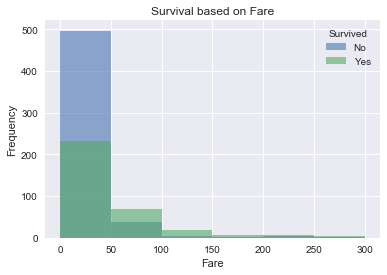

In [241]:
survivedXFare = train.groupby("Survived")["Fare"]
ax1, ax2 = survivedXFare.plot(kind="hist", alpha=0.6, bins=range(0, 350, 50))

ax1.set_xlabel("Fare")
ax2.set_ylabel("Frequency")

ax1.legend(["No", "Yes"], title="Survived")
plt.title("Survival based on Fare")
plt.show()

### 2.7.3 Normalization 

In [242]:
train["Fare"] = train["Fare"].astype(int)

### 2.7.4 Add a new column

Similar to column Age, add a new column to intervals

In [243]:
train["FareInt"] = pd.qcut(train["Fare"], 4)

Pands.qcut is a Quantile-based discretization function. 
Reference link: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.qcut.html

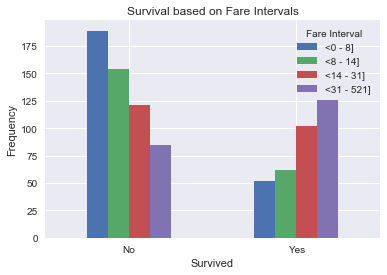

In [244]:
# Plot the new column
survivedXFareinterval = pd.crosstab(train["Survived"], train["FareInt"])
ax = survivedXFareinterval.plot(kind="bar", legend=True)

ax.set_xlabel("Survived")
ax.set_ylabel("Frequency")

plt.xticks([0, 1], ["No", "Yes"], rotation=0)
plt.legend(["<0 - 8]", "<8 - 14]", "<14 - 31]", "<31 - 521]"], title="Fare Interval", loc = "upper right")
plt.title("Survival based on Fare Intervals")
plt.show()

Now replace the content of new column FareInt with numeric values

In [245]:
# To get the limits of intervals, remove the label from plt.legend like this:
# plt.legend( title="Fare Interval")

def getFareId(fare):
    if fare <= 7.91:
        return 0
    if fare <= 14.454:
        return 1
    if fare <= 31:
        return 2
    return 3

train["FareInt"] = train["Fare"].apply(lambda x: getFareId(x))

Now remove the column Fare

In [246]:
train = train.drop("Fare", axis = 1)

### 2.7.5 Replicate to test

In [247]:
# Already replace missing values in test set
# test.loc[test["Fare"].isnull(), "Fare"] = test["Fare"].mean()
test["Fare"] = test["Fare"].astype(int)
test["FareInt"] = pd.qcut(test["Fare"], 4)
test["FareInt"] = test["Fare"].apply(lambda x: getFareId(x))
test = test.drop("Fare", axis = 1)

## 2.8 Ticket

### 2.7.8 Missing values

In [248]:
miss_ticket = pd.DataFrame({"train" : train["Ticket"].isnull().sum(), "test": test["Ticket"].isnull().sum()}, index = ["Count"])
miss_ticket.head()

,test,train
Count,0,0


### 2.8.3 Normalization 

Check the different values of ticket

In [249]:
train.Ticket.nunique()

681

Since there are so many different values, and actually the flight ticket is not related to the target feature (Survived column), just drop the column

In [250]:
train = train.drop("Ticket", axis = 1)

### 2.8.3 Replicate to test

In [251]:
test = test.drop("Ticket", axis = 1)

## 2.9 PassengerId

Just remove the column.

In [257]:
train = train.drop("PassengerId", axis = 1)

Now check how are our sets after analysing the data

In [258]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,AgeInt,Title,FareInt
0,0,3,1,22,1,0,2,1,0,0
1,1,1,0,38,1,0,0,2,2,3
2,1,3,0,26,0,0,2,1,1,0
3,1,1,0,35,1,0,2,2,2,3
4,0,3,1,35,0,0,2,2,0,1


In [259]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,AgeInt,Title,FareInt
0,892,3,1,34,0,0,1,2,0,0
1,893,3,0,47,1,0,2,2,2,0
2,894,2,1,62,0,0,1,3,0,1
3,895,3,1,27,0,0,2,1,0,1
4,896,3,0,22,1,1,2,1,2,1


In [252]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,AgeInt,Title,FareInt
0,1,0,3,1,22,1,0,2,1,0,0
1,2,1,1,0,38,1,0,0,2,2,3
2,3,1,3,0,26,0,0,2,1,1,0
3,4,1,1,0,35,1,0,2,2,2,3
4,5,0,3,1,35,0,0,2,2,0,1


In [253]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,AgeInt,Title,FareInt
0,892,3,1,34,0,0,1,2,0,0
1,893,3,0,47,1,0,2,2,2,0
2,894,2,1,62,0,0,1,3,0,1
3,895,3,1,27,0,0,2,1,0,1
4,896,3,0,22,1,1,2,1,2,1


In [254]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,AgeInt,Title,FareInt
0,1,0,3,1,22,1,0,2,1,0,0
1,2,1,1,0,38,1,0,0,2,2,3
2,3,1,3,0,26,0,0,2,1,1,0
3,4,1,1,0,35,1,0,2,2,2,3
4,5,0,3,1,35,0,0,2,2,0,1


In [255]:
#whos

In [256]:
#del g, survivedXAge  ,ax2        ,ax1                 